# Load Images

In [50]:
from os import listdir
import numpy as np

forward_files = listdir('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_forward')
right_files = listdir('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_right')
left_files = listdir('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_left')
back_files = listdir('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_back')
forward_images = []
right_images = []
left_images = []
back_images = []
for file in forward_files:
    forward_images.append(np.load('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_forward/'+file))
for file in right_files:
    right_images.append(np.load('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_right/'+file))
for file in left_files:
    left_images.append(np.load('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_left/'+file))
for file in back_files:
    back_images.append(np.load('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/out/images/_out_back/'+file))

# Load Measurements

## Training Measurments

In [3]:
from os import listdir
import numpy as np

measurements_files = listdir('/media/eslam/D0FCBC10FCBBEF3A/Path_planning_Paper_Dataset/training_data/measurements')
measurements_files.sort()
measurements = []
num_of_items = 0
for file in measurements_files:
    measurements.append(np.load('/media/eslam/D0FCBC10FCBBEF3A/Path_planning_Paper_Dataset/training_data/measurements/'+file))
    num_of_items += len(measurements[-1])

print("Number of episodes = ",len(measurements))
print("Number of items = ",num_of_items)
#print(measurements_files)

Number of episodes =  1510
Number of items =  364181


## Validation Measurments

In [ ]:
from os import listdir
import numpy as np

measurements_files = listdir('/media/eslam/D0FCBC10FCBBEF3A/Path_planning_Paper_Dataset/validation_data/measurements')
measurements_files.sort()
measurements = []
num_of_items = 0
for file in measurements_files:
    measurements.append(np.load('/media/eslam/D0FCBC10FCBBEF3A/Path_planning_Paper_Dataset/validation_data/measurements/'+file))
    num_of_items += len(measurements[-1])

print("Number of episodes = ",len(measurements))
print("Number of items = ",num_of_items)
#print(measurements_files)

# Visualize sample of data

177


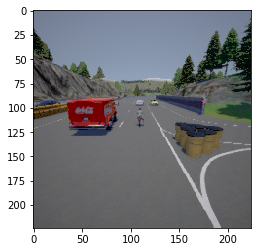

In [29]:
from os import listdir
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

sample_images = np.load('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/Path_Planning_using_Deeplearning/out/images/_out_forward/Episode_00002.npy')
print(len(sample_images))
img = Image.fromarray(sample_images[175], 'RGB')
plt.imshow(img)

## Cut upper part from image (1/3 from image will be removed)

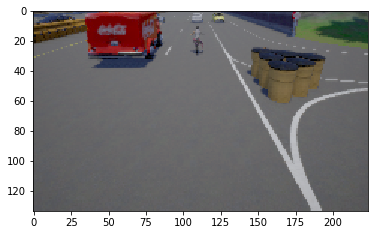

In [30]:
img = Image.fromarray(sample_images[175][90:,:,:], 'RGB')
plt.imshow(img)

# Convert 0 throttle to 0.5

In [ ]:
from os import listdir
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline 

saving_mes_dir = '/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/Path_Planning_using_Deeplearning/out/measurements_modified'
measurements_files = listdir('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/Path_Planning_using_Deeplearning/out/measurements')
measurements_files.sort()
episode_num = 0
measurements = []
for file in measurements_files:
    episode_num += 1
    sample_mes = np.load('/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/Path_Planning_using_Deeplearning/out/measurements/'+file)
    for j in range(len(sample_mes)):
        if sample_mes[j,0] == 0.0:
            sample_mes[j,0] = 0.5
        np.save(saving_mes_dir+"/Episode_" + str(episode_num).zfill(5),
                            np.asarray(sample_mes, dtype=np.float16))

# Load the new mes
measurements_files = listdir(saving_mes_dir)
measurements_files.sort()
measurements = []
num_of_items = 0
for file in measurements_files:
    measurements.append(np.load(saving_mes_dir + '/'+file))
    num_of_items += len(measurements[-1])

print("Number of episodes = ",len(measurements))
print("Number of items = ",num_of_items)
print(measurements_files)

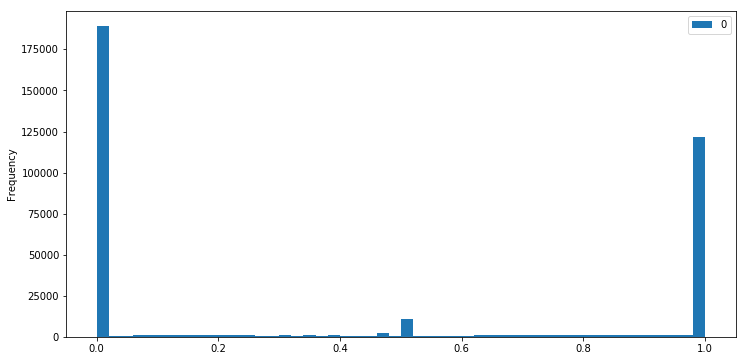

In [22]:
import pandas
# create pandas
mes_per_frame = []
for i in range(0, len(measurements)):
    for j in range(0,len(measurements[i])):
        mes_per_frame.append(measurements[i][j])
index = ['Frame'+str(i) for i in range(1, len(mes_per_frame)+1)]

df = pandas.DataFrame(mes_per_frame, index=index)

# Throttle
df[0].plot(kind = 'hist', bins = 50, figsize=(12, 6),legend=True)

# Throttle / steering / brake / speed analysis

In [7]:
import pandas
import numpy

mes_per_frame = []
for i in range(0, len(measurements)):
    for j in range(0,len(measurements[i])):
        mes_per_frame.append(measurements[i][j])
index = ['Frame'+str(i) for i in range(1, len(mes_per_frame)+1)]

df = pandas.DataFrame(mes_per_frame, index=index)

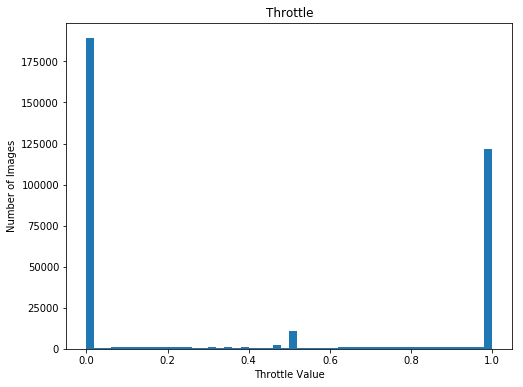

In [49]:
# Throttle

ax = df[0].plot(kind = 'hist', bins = 50, figsize=(8, 6), title="Throttle")
ax.set(xlabel="Throttle Value", ylabel="Number of Images")
fig = ax.get_figure()
fig.savefig('Throttle.pdf')

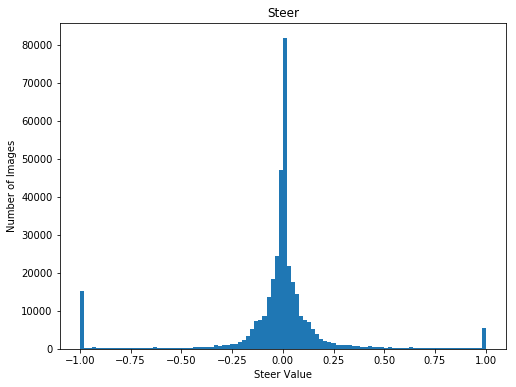

In [50]:
# steer

ax = df[1].plot(kind = 'hist', bins = 100, figsize=(8, 6), title="Steer")
ax.set(xlabel="Steer Value", ylabel="Number of Images")
fig = ax.get_figure()
fig.savefig('steer.pdf')

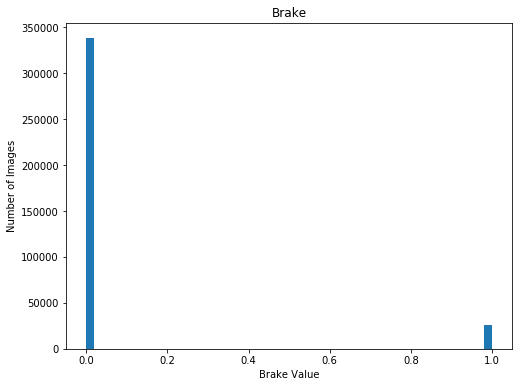

In [51]:
# brake

ax = df[2].plot(kind = 'hist', bins = 50, figsize=(8, 6), title="Brake")
ax.set(xlabel="Brake Value", ylabel="Number of Images")
fig = ax.get_figure()
fig.savefig('brake.pdf')

# stitch them to one image horizontally and verticaly:

In [52]:
import numpy as np
import PIL

list_im = ['throttle.png', 'steer.png', 'brake.png']
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'Trifecta.jpg' )    

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'Trifecta_vertical.jpg' )

/home/eslam/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/home/eslam/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from ipykernel import kernelapp as app


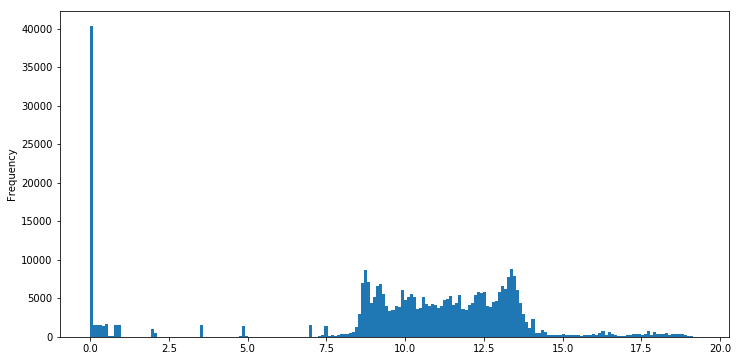

In [15]:
# speed

df[3].plot(kind = 'hist', bins = 200, figsize=(12, 6))

# Draw training loss and val loss VS Epochs

0.032416313886642456



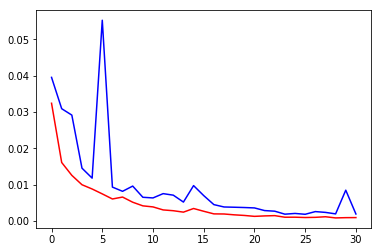

In [77]:
import matplotlib.pyplot as plt
import numpy as np

training_loss = []
val_loss = []
epochs = range(0, 31)

f=open("/home/eslam/Masters/Advanced_NN/CARLA_0.9.4/Path_Planning_using_Deeplearning/Training/RGB/experiments/rgb_stacked_4_speed/loss_tracking.txt", "r")
f1 = f.readlines()
print(f1[0].split(" ")[-1])
for i, x in enumerate(f1):
    #print(x.split(" ")[-1])
    if i%2 ==0:
        training_loss.append(round(float(x.split(" ")[-1]), 5))
    else:
        val_loss.append(round(float(x.split(" ")[-1]), 5))
plt.plot(epochs, training_loss,'r',epochs, val_loss,'b')

In [64]:
import numpy as np
import sys
import cv2
images_path = np.load('/media/eslam/D0FCBC10FCBBEF3A/Path_planning_Paper_Dataset/training_data/images/_out_forward/Episode_00003.npy')
cv2.imwrite("129_0.png",images_path[129])


True